<a href="https://colab.research.google.com/github/tas-anne/Digital-SIgnal-Processing-LabTask/blob/main/Lab_5_190041220.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Name: Tasfia Tasneem Annesha
##ID: 190041220


importing libraries:

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

#Task 1

###Create a random signal x with 256 samples. Then, take an impulse response with 51 samples and a shape similar as shown in the figure.

In [ ]:
x = np.random.rand(256) #generating random signal

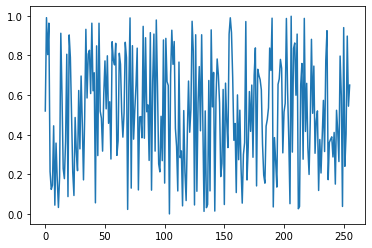

In [ ]:

plt.plot(x)

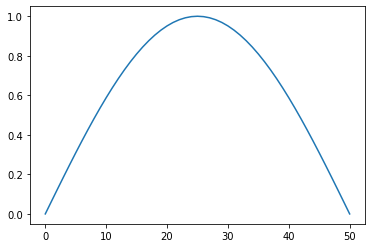

In [ ]:
n_samples = 51
theta = np.linspace(0, 180, n_samples)
h = np.sin(np.deg2rad(theta))
plt.plot(h)

**i. First convolve them normally using np.convolve (time domain convolution). The
output will have N+M-1 samples.**

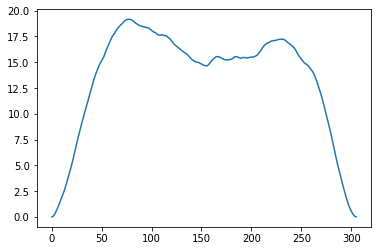

In [ ]:
S = np.convolve(x, h)
plt.plot(S)

**ii. Then, convolve them using a 256 point DFT convolution. DFT convolution is done by
first taking the signals into frequency domain then, multiplying them elementwise the
doing IDFT. You will need to pad the impulse response so that it becomes 256 points as
well. The output of DFT convolution will have 256 samples.**

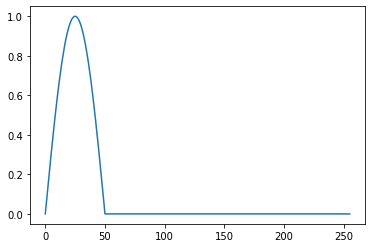

In [ ]:
X = np.fft.fft(x)
h_padded = np.zeros(256)
h_padded[:51] = h
H = np.fft.fft(h_padded)
y_freq = np.fft.ifft(X * H)
plt.plot(h_padded)

**iii. Show the region where there is a difference between the output of these two
methods of convolution. What is reason behind this discrepancy?**

In [ ]:
diff = S - y_freq
plt.plot(diff)
plt.title('Difference between time and DFT convolution')
plt.xlabel('Sample')
plt.ylabel('Difference')
plt.show()

ValueError: ignored

Here, the DFT Convolution attempts to fit each of the 256 point periods with all 306 points of the correct output signal, which pushes 49 samples into overlapping periods. The first 49 samples in this case are different from the convolution output because they overlap the final 49 samples, which cannot fit into the 256 points.We call this circular convolution.

**iv. How can you solve or avoid this problem? Implement this solution in your code.**

In [ ]:
def overlap_add(x, h, L):
    h_pad = np.pad(h, (0, L - len(h)), 'constant')
    num_segments = int(np.ceil(x.shape[0] / L))
    x_segments = []
    for i in range(num_segments):
        segment = [0] * L
        segment[:len(x)] = x
        x_segments.append(segment)
    h_segments = np.tile(h_pad, (num_segments, 1))

    #DFT of each segment of x and h
    X = np.fft.fft(x_segments, axis=1)
    H = np.fft.fft(h_segments, axis=1)

    # Multiply the DFT( element-wise )
    Y = X * H

    # inverse DFT of each product
    y_segments = np.fft.ifft(Y, axis=1)

    y = np.zeros(x.shape[0] + h.shape[0] - 1)

    for i in range(num_segments):
        start_idx = i * L
        end_idx = min(start_idx + L, y.shape[0])
        y[start_idx:end_idx] += y_segments[i, :(end_idx - start_idx)].real

    return y

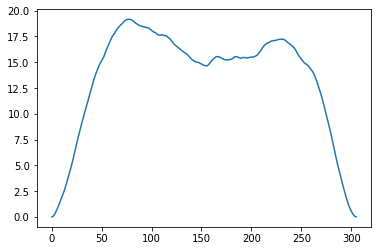

In [ ]:
y_overlap_add = overlap_add(x, h, 600)
plt.plot(y_overlap_add)


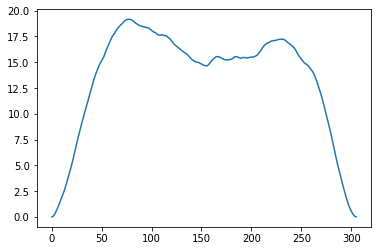

In [ ]:
plt.plot(S)

#Task 2

<StemContainer object of 3 artists>

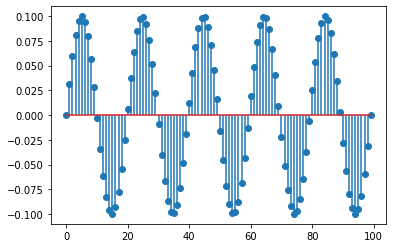

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

freq=1
amplitude=0.1
t=np.linspace(0,5,100)
wave=amplitude*np.sin(2*np.pi*freq*t)
plt.stem(wave)

<StemContainer object of 3 artists>

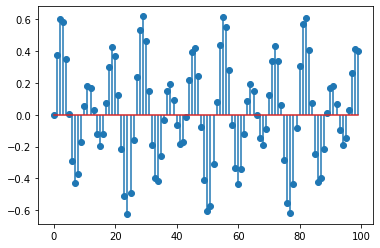

In [ ]:
freq1, freq2 = 1.5, 2.25
amplitude1, amplitude2 = 0.25, 0.4
t = np.linspace(0, 5, 100)
wave1 = amplitude1 * np.sin(2 * np.pi * freq1 * t)
wave2 = amplitude2 * np.sin(2 * np.pi * freq2 * t)

wave = wave1 + wave2
plt.stem(wave)

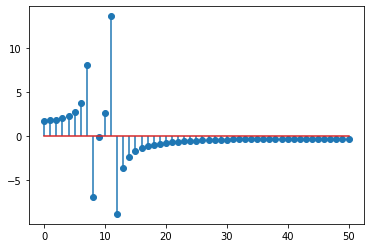

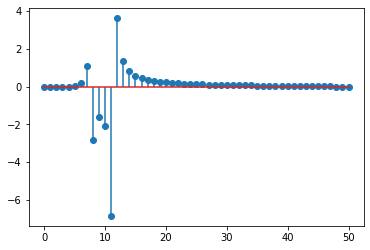

In [ ]:
wave1_freq = np.fft.rfft(wave1)
wave2_freq = np.fft.rfft(wave2)

wave_freq = np.fft.rfft(wave)

addition = wave1_freq + wave2_freq
plt.stem(addition.real) # real part
plt.show()
plt.stem(addition.imag) # imaginary part
plt.show()

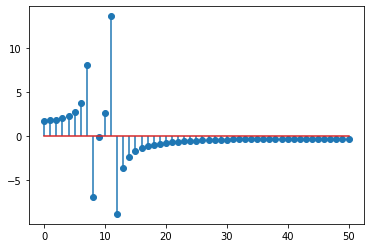

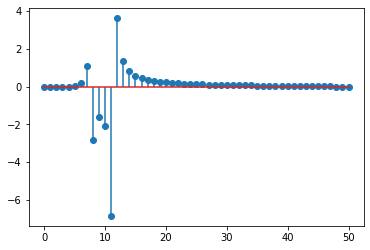

In [ ]:
plt.stem(wave_freq.real)
plt.show()
plt.stem(wave_freq.imag)
plt.show()

Addition in the time domain corresponds to addition in the frequency domain, so additivity is maintained.

#Task 3

**i. Construct a symmetrical time domain signal. Find its DFT and polar format and show
that the phase is linear. What happens to the phase if you shift the signal in the time
domain?**

i. Construct a symmetrical time domain signal. Find its DFT and polar format and show
that the phase is linear. What happens to the phase if you shift the signal in the time
domain?

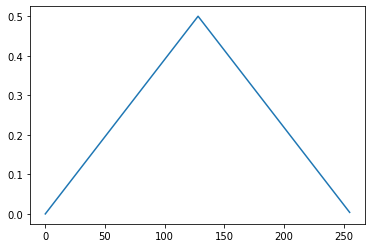

In [ ]:
import numpy as np
# Generate a symmetrical time domain signal
N = 256
x = np.concatenate((np.arange(0, N//2, 1), np.arange(N//2, 0, -1)))/N
plt.plot(x)


<StemContainer object of 3 artists>

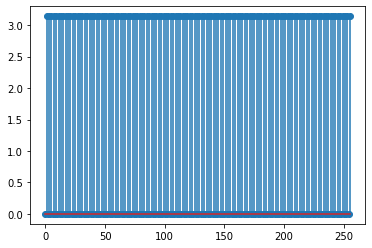

In [ ]:
X = np.fft.fft(x)
mag_X = np.abs(X)
phase_X = np.angle(X)
plt.stem(phase_X, label='Original')

The phase of the DFT will be shifted by 2pik*n/N if the signal is moved by a time delay of n samples, where k is the frequency bin index and N is the total number of samples. Accordingly, the phase shift will depend on the frequency and length of the time delay.


<StemContainer object of 3 artists>

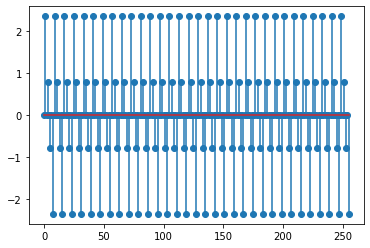

In [ ]:
# Shift the signal in the time domain by 32 samples
n_delay = 32
x_shifted = np.roll(x, n_delay)

# Compute the DFT of the shifted signal and its polar format
X_shifted = np.fft.fft(x_shifted)
mag_X_shifted = np.abs(X_shifted)
phase_X_shifted = np.angle(X_shifted)

plt.stem(phase_X_shifted, label='Shifted')

**ii. Shift the symmetrical time domain signal so that its symmetry is around the zero-th
sample and show that the phase is zero.**

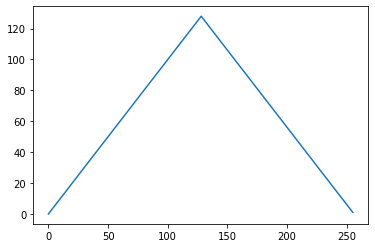

In [ ]:
N = 256
x = np.concatenate((np.arange(0, N//2), np.arange(N//2, 0, -1)))
plt.plot(x)

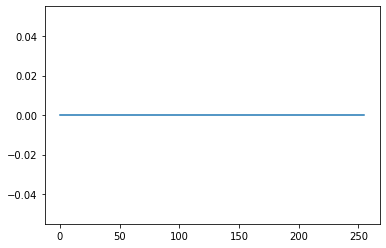

In [ ]:
shifted_signal = np.fft.fftshift(x)
dft = np.fft.fft(shifted_signal)
mag = np.abs(dft)
phase = np.angle(dft)

plt.plot(phase)

**iii. Construct an asymmetrical signal and show that the corresponding phase signal is
non-linear.**

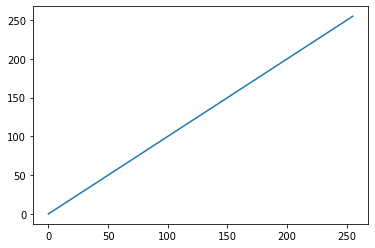

In [ ]:
N = 256
x = np.arange(0, N)
plt.plot(x)

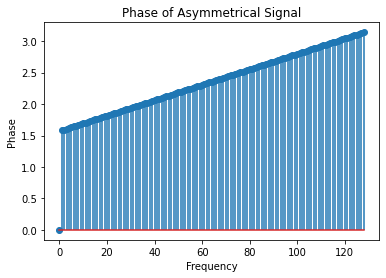

In [ ]:
dft = np.fft.rfft(x)
mag = np.abs(dft)
phase = np.angle(dft)
plt.stem(phase)
plt.title("Phase of Asymmetrical Signal")
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.show()

#Task 4

Show that the phase contains information on the location of events in the time domain
signal by recreating the experiment shown in the figure.
i. First, create a 256 point time domain signal with that looks like as shown in the figure.
Then, find its DFT in polar format (magnitude and phase).

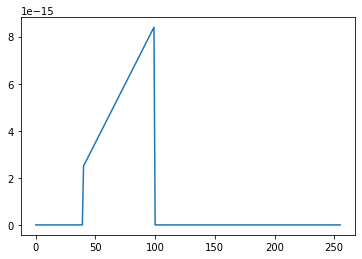

In [ ]:
x = np.zeros(256)
for i in range(40, 100):
    x[i] = 0.0000000000000001 * (i-15) 
plt.plot(x)

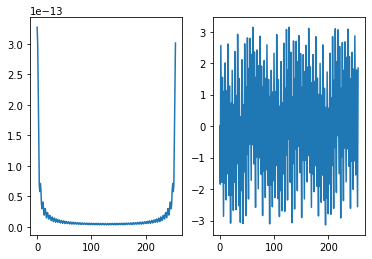

In [ ]:
X = np.fft.fft(x)
mag = np.abs(X)
phase = np.angle(X)
fig,ax =  plt.subplots(1, 2)
ax[0].plot(mag)
ax[1].plot(phase)
plt.show()

**ii. Keep the magnitude unchanged but replace the phase with random values in the
range (-pi to pi). Reconstruct the time domain by performing IDFT with the changed
phase and unchanged magnitude.**

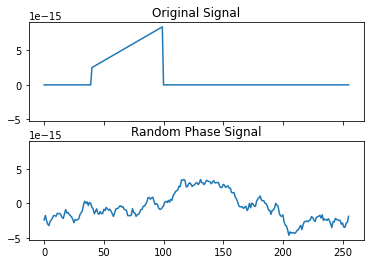

In [ ]:
mag_orig = np.abs(X)
phase = np.angle(X)
phase_rand = np.random.uniform(low=-np.pi, high=np.pi, size=X.shape)
X_new = mag * np.exp(1j * phase_rand)
x_new = np.fft.ifft(X_new)
fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)
axs[0].plot(x)
axs[0].set_title('Original Signal')
axs[1].plot(x_new)
axs[1].set_title('Random Phase Signal')
plt.show()

**iii. Keep the phase unchanged but replaced the magnitude with random values in the range (-1 to 1). Reconstruct the time domain by performing IDFT with the changed magnitude and unchanged phase.**

<StemContainer object of 3 artists>

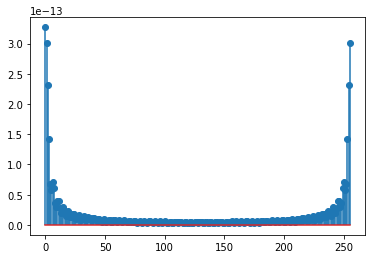

In [ ]:
PhaseX = math.pi - 2 * math.pi * np.random.random(128)
plt.stem(mag)